<a href="https://colab.research.google.com/github/Dharyakushwaha101/real-image-to-cartoon/blob/main/Untitled23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

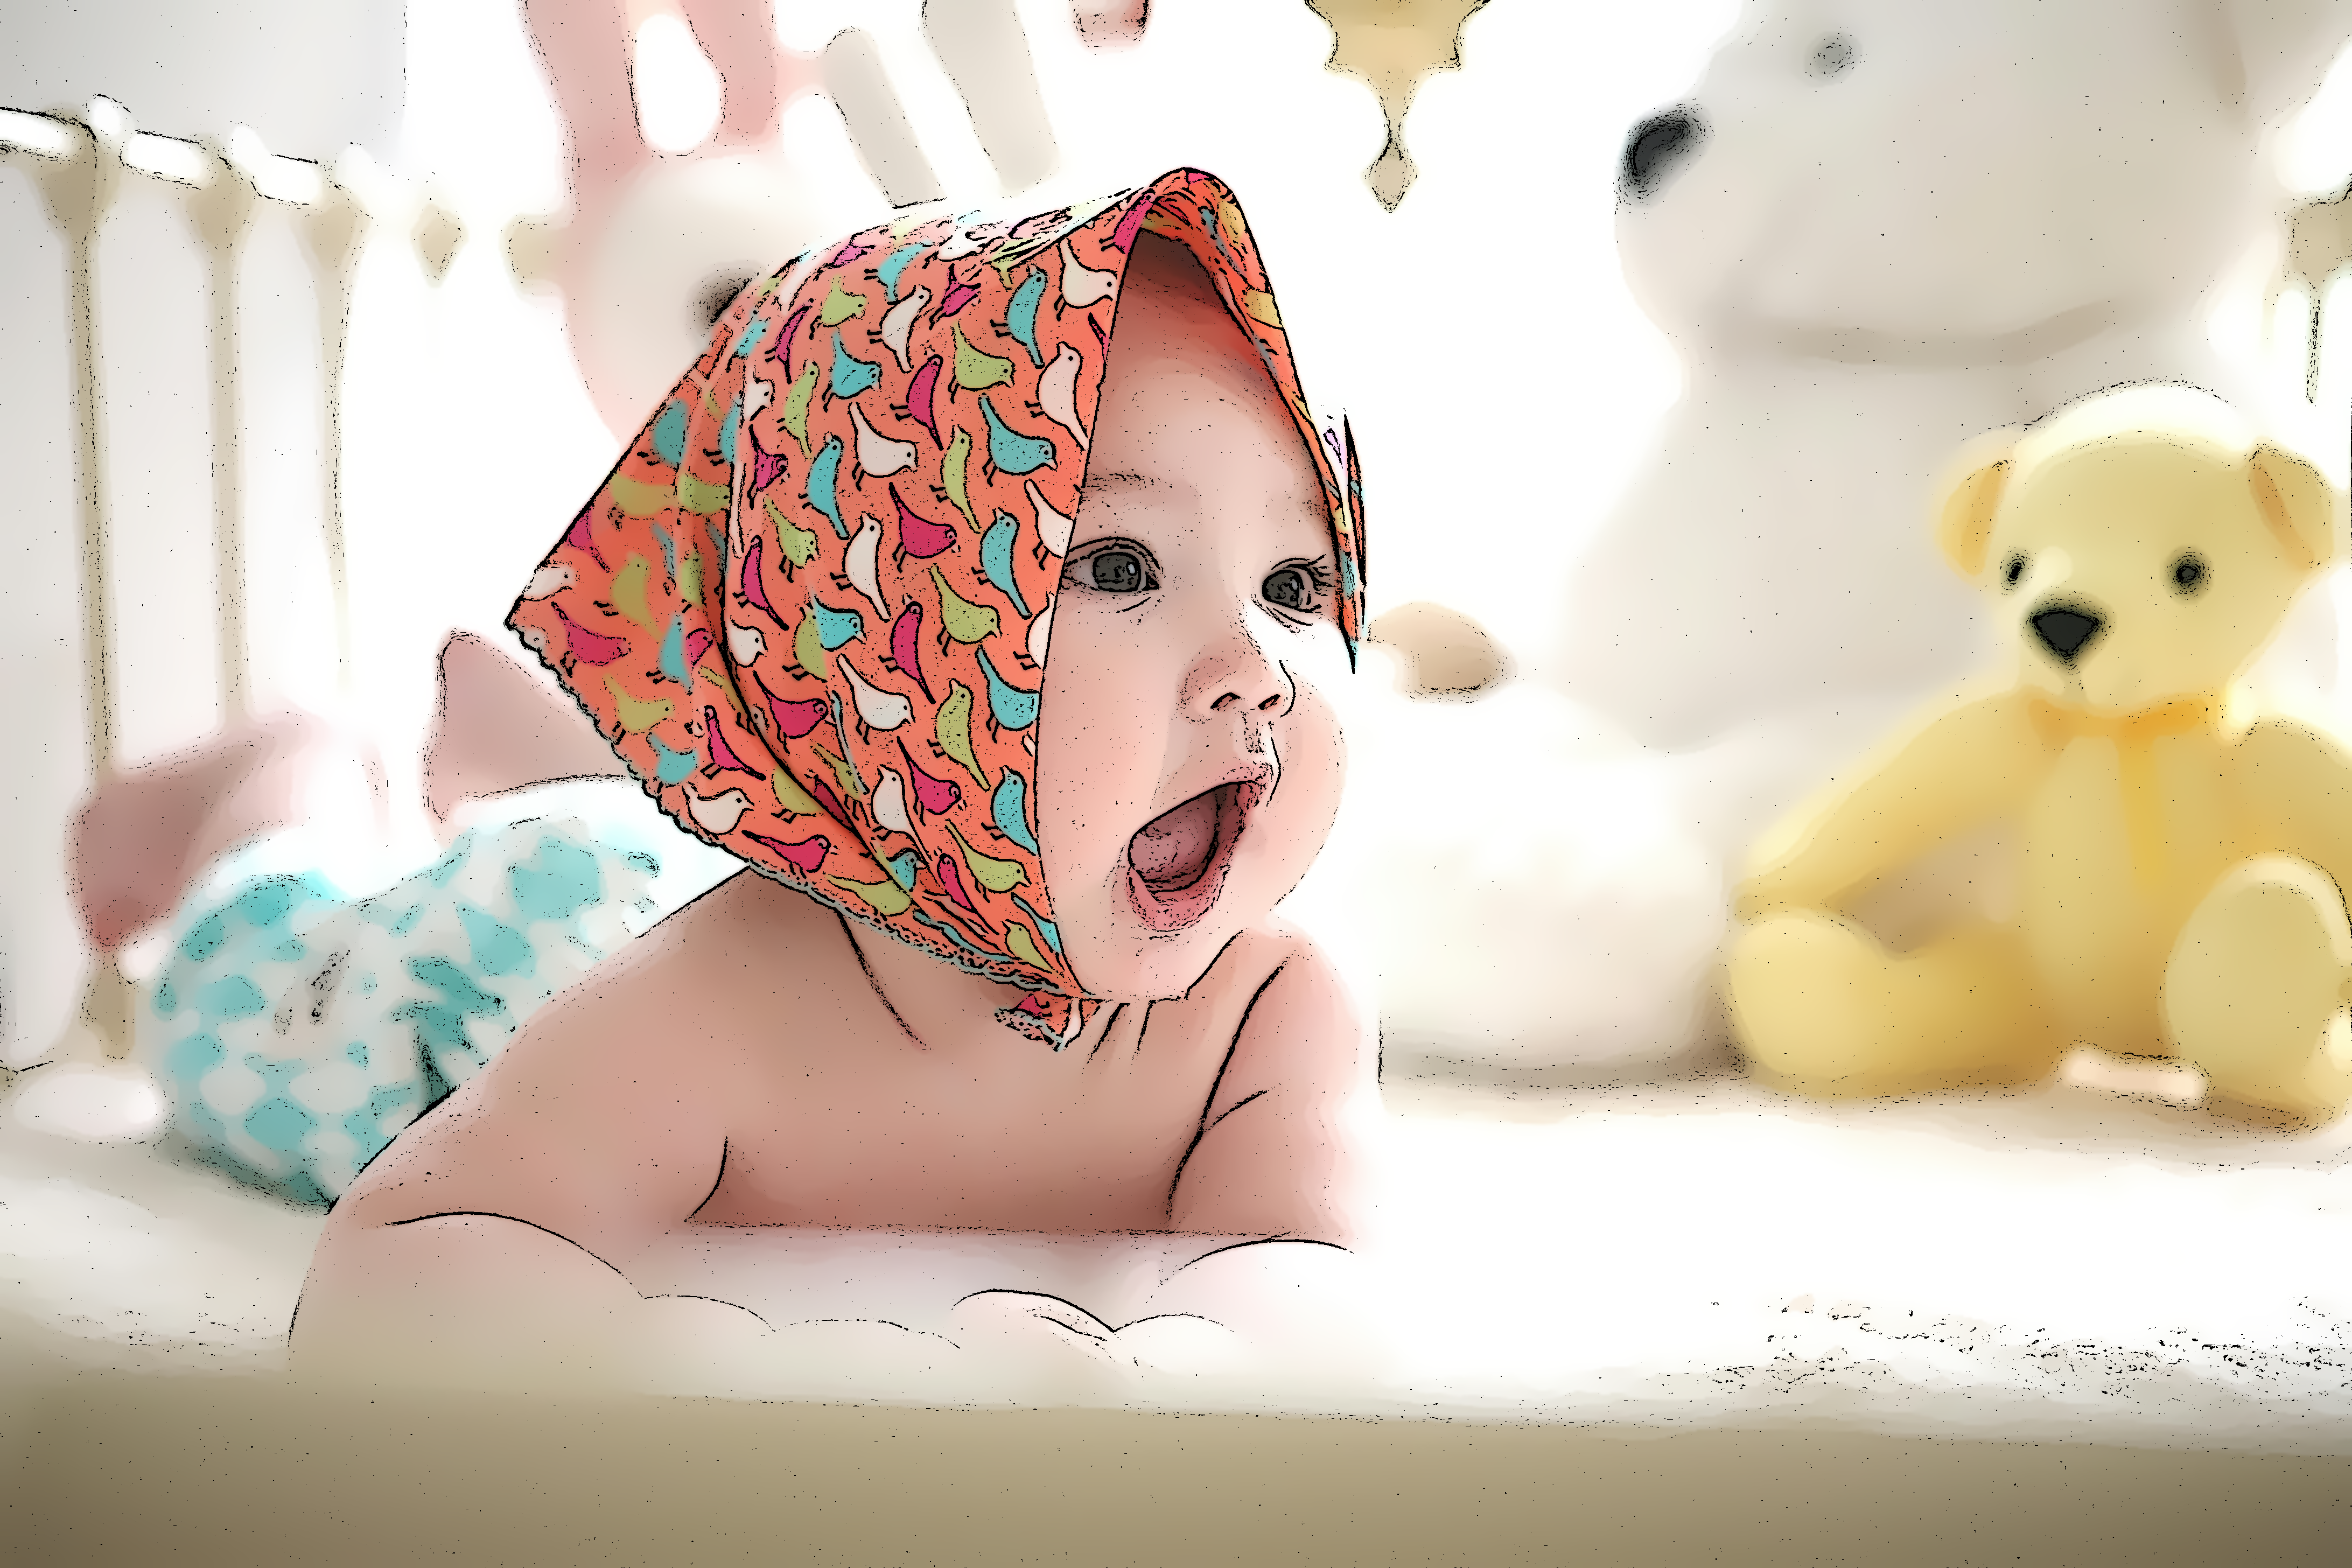

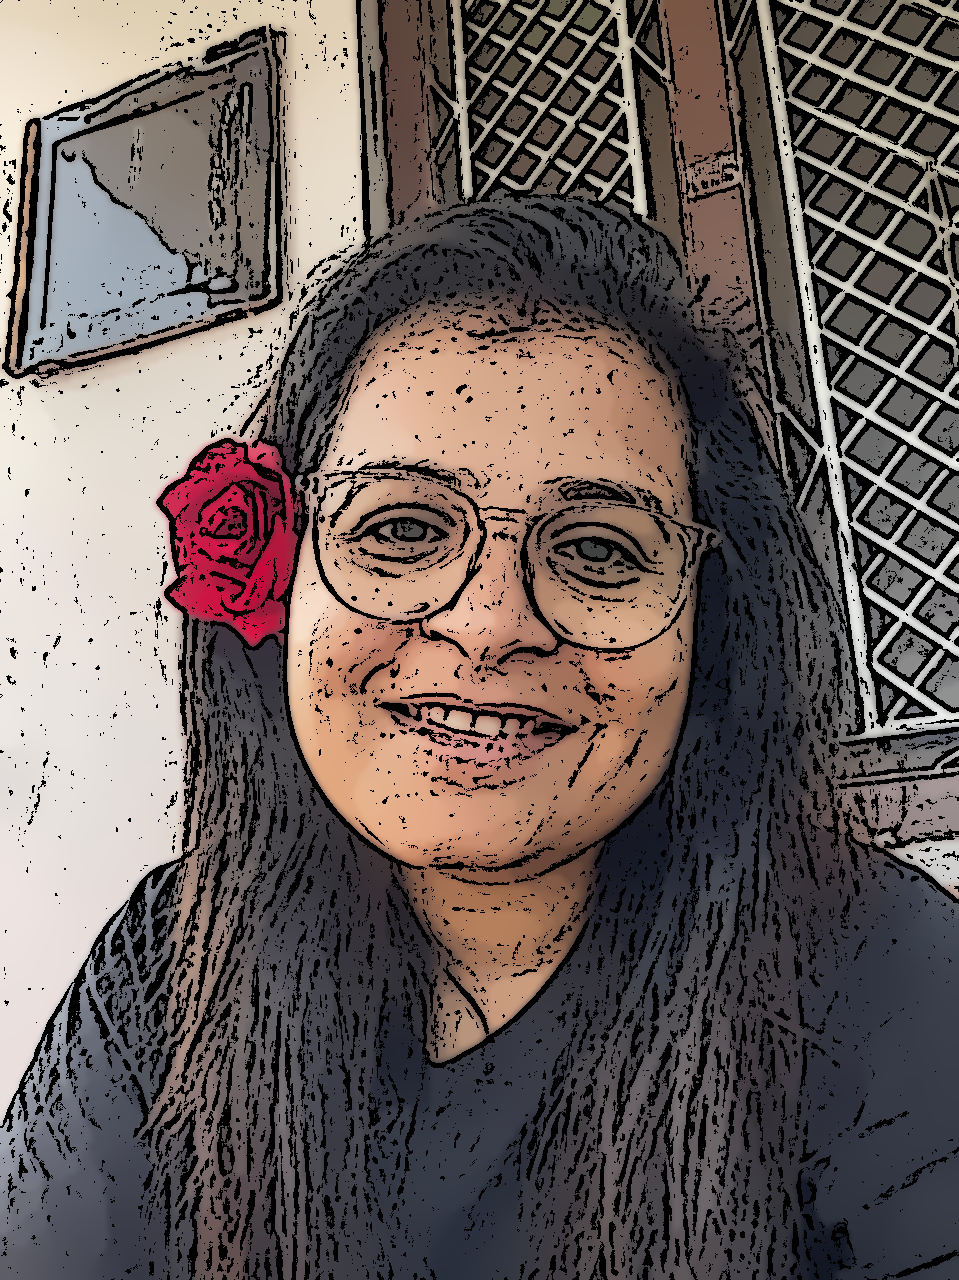

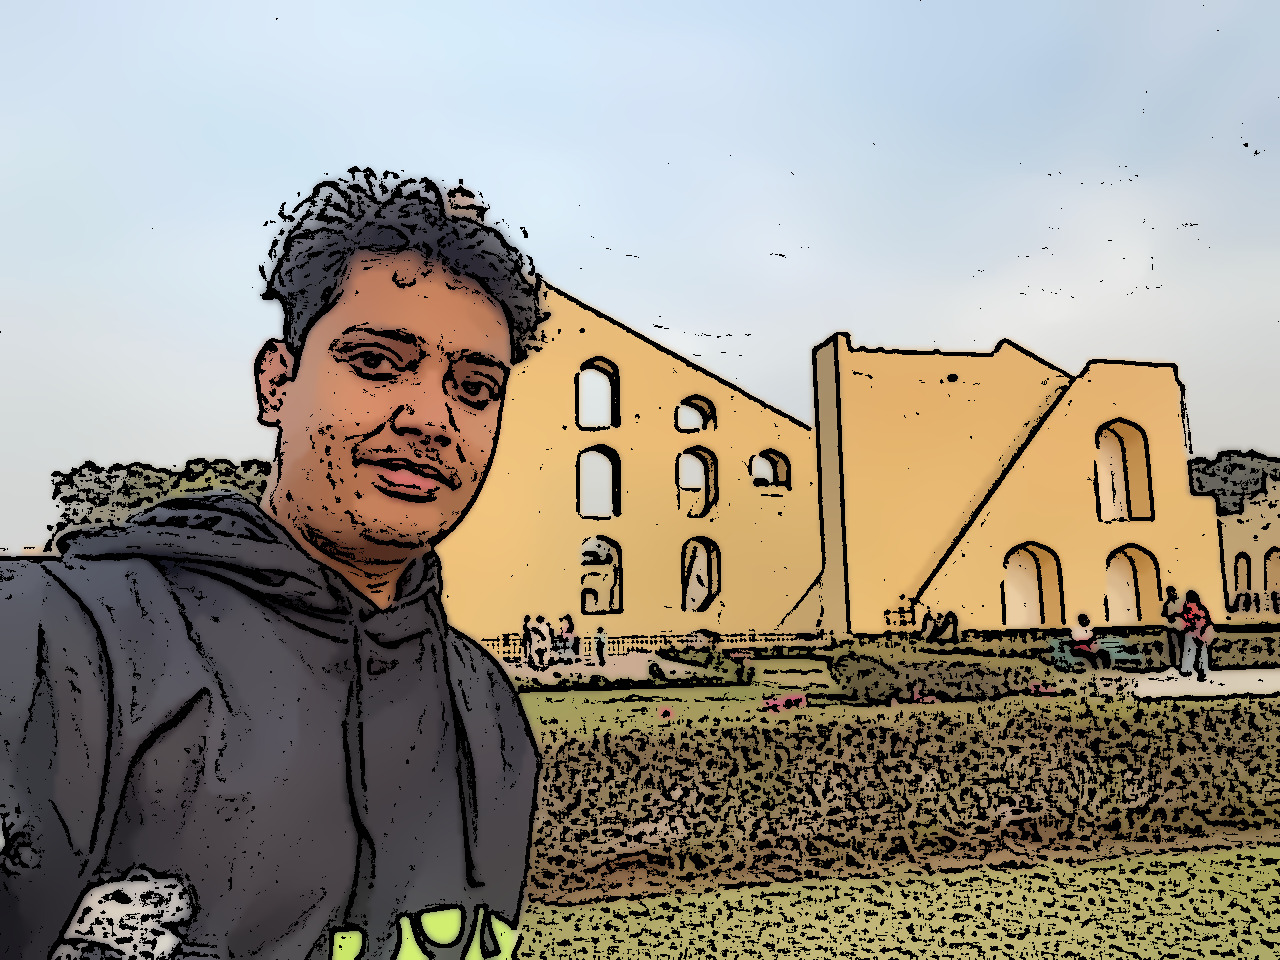

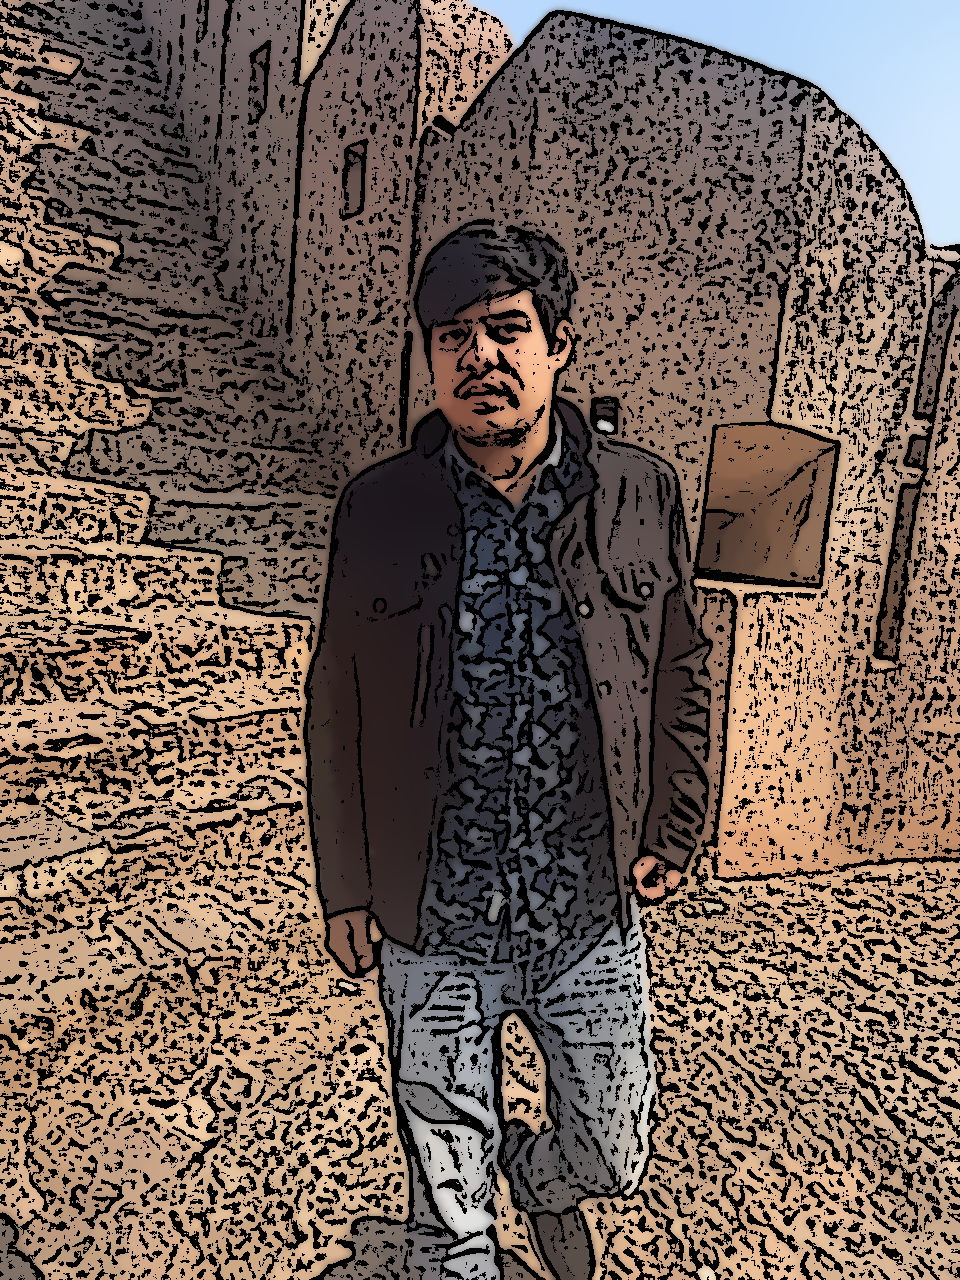

In [15]:
import cv2
import os
from google.colab.patches import cv2_imshow

def cartoonize(img_path):
    num_down = 2
    num_bilateral = 7

    # Read the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"No such image found. Please check the file path: {img_path}")
        return

    img_copy = img.copy()

    # Downsample the image using Gaussian pyramid
    for _ in range(num_down):
        img_copy = cv2.pyrDown(img_copy)

    # Apply small bilateral filter instead of a large one
    for _ in range(num_bilateral):
        img_copy = cv2.bilateralFilter(img_copy, d=9, sigmaColor=9, sigmaSpace=7)

    # Upsample the image to original size
    for _ in range(num_down):
        img_copy = cv2.pyrUp(img_copy)

    # Ensure the size matches the original image
    if img_copy.shape != img.shape:
        img_copy = cv2.resize(img_copy, (img.shape[1], img.shape[0]))

    # Convert to grayscale and apply median blur
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.medianBlur(img_gray, 7)

    # Detect and enhance edges
    img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                     cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY,
                                     blockSize=9,
                                     C=2)

    # Convert back to color image
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2BGR)

    # Combine edge image with color image
    img_cartoon = cv2.bitwise_and(img_copy, img_edge)

    # Display the result using cv2_imshow
    cv2_imshow(img_cartoon)

# List of image paths
img_paths = [
    "/content/pexels-pixabay-265987.jpg",
    "/content/Ashu.jpg",
    "/content/Gavi.jpg",
    "/content/Sunny.jpg"
]

# Ensure the file exists before proceeding and cartoonize each image
for img_path in img_paths:
    if not os.path.isfile(img_path):
        print(f"The file {img_path} does not exist.")
    else:
        cartoonize(img_path)
